# From csv to slippy map: Intro to spatial data in R

Anna Spiers, CU Boulder  
08 June 2021
R Ladies Boulder Chapter Meetup

![schneider-et-al-2017](figures/schneider-et-al-2017.png)
Schneider et al. 217, *Nat Comm*

**Learning objectives**  
1. Describe and identify spatial data
2. Understand the basic differences between the `sp` and `sf` packages
3. Manipulate vector data in R
4. Transform coordinate reference system of data
5. Plot an interactive map of spatial data

### What is spatial data?

![spatial_examples](figures/spatial_examples.png)

* Spatial data are data that contain information about a specific location in space, in relative (e.g., two trees are 2m apart) or absolute (e.g., on Earth) terms 
* Different types:
    * Vector: graphical respresentations of the world 
        * points, lines polygons
        * File type: .shp, .kml, .kmz, .gpx
    * Raster: grid of numbers
        * ex: digital elevation model (DEM), microscope image
        * File type: .tif
    * 3D: three-dimensional
        * point clouds
        * File type: .las, laz

### Vector data
* We will work with vector data in this tutorial 
**AIS another image of the vector data examples**
* Data types:
    * Points: field sites, state capitols, sensor locations
    * Lines: rivers, division in topography, flight line
    * Polygons: field plot, county boundaries, buffer around a point or line
* Vector data typically store a **geometry** (vertex coordinates) and **attributes** (metadata) for each feature
* File types
    * .shp - [ESRI](https://www.esri.com/en-us/home) developed the shapefile. Consists of several files, so zip them before sharing.
    * .kml/.kmz - Keyole Markup Language. The KML was developed by Keyhole, Inc. which was acquired by Google. It is a simple spatial data format that was originally designed for Google Earth, but now is compatible with non-Google products. A form of XML
    * .gpx - The geopackage is a more modern alternative to the shapefile. You can save different types of spatial data together in one gpx file. Often used in QGIS
    * Many more file types, but we'll stop here
* We will work with shapefiles.
    

### Case example
* Wog Wog Habitat Fragmentation Experiment
![wogwog](figures/wogwog.png)
* Join me as a graduate student in an Ecology & Evolutionary Biology department. We have the coordinates for the invertebrate pitfall traps across the site. We want to make an interactive map of the field site. How do we do this? 
* High-level workflow
    1. CSV with coordinates of traps
    2. Convert CSV to SHP
    3. Plot SHP as map

### Getting started in R: spatial packages
* There are tons of spatial packages
* Two main ones are `sp` and `sf`.
* `sp`
    * First released on CRAN in 2005
    * Offers functionality to create and modify vector data and grids
    * Many (about 350) of R's spatial packages use `sp` as a dependency
    * Made up of 'slots' that describe the spatial object: always a bounding box and coordinate reference system (CRS), but also attributes (e.g., name, soil type, replicate)
    * Examples of `sp` object classes: `SpatialPoints`, `SpatialLines`, `SpatialLinesDataFrame`, `SpatialPolygonsDataFrame`, and more
    * To read in a shapefile: `read_OGR()`
* `sf`
    * Stands for 'Simple Features'
    * First released on CRAN in 2016
    * Implements the [WKT (well-known text)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) format standard
    * Examples of `sf` object classes: `POINT`, `LINESTRING`, `POLYGON`, and more
    * To read in a shapefile: `st_read()` - slightly faster than `read_OGR()`
* Data are structured and conceptualized differently between `sp` and `sf`. Other spatial packages may have different formatting standards and class definitions, but many are built as wrappers around the backbone of `sp` and increasingly more `sf`.

In [59]:
library(sp)
library(sf)
library(rgdal) #readOGR()
library(raster) #crs()
library(tmap)

#options(warn = - 1) # Disable warning messages globally
#suppressWarnings(expr)
options(error = expression(NULL))

In [60]:
# Load csv
sites_sf <- sf::st_as_sf(sites, coords=c("lon", "lat"))
st_crs(sites_sf) <- 4326
head(sites_sf)


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

,name,rep,size,place,geometry
,<chr>,<int>,<chr>,<chr>,<POINT [°]>
1,1Sout,1,S,out,POINT (149.4607 -37.0574)
2,1Lin,1,L,in,POINT (149.4594 -37.05986)
3,1Lout,1,L,out,POINT (149.4576 -37.06033)
4,2Sin,2,S,in,POINT (149.4637 -37.0605)
5,2Sout,2,S,out,POINT (149.4648 -37.06004)
6,2Min,2,M,in,POINT (149.4635 -37.06196)


In [63]:
# Load fragment boundaries (already a shp) through sp and sf packages
frags_sp <- readOGR("data/example_frag_outlines_UTM")
frags_sf <- st_read("data/example_frag_outlines_UTM")

OGR data source with driver: ESRI Shapefile 
Source: "/Volumes/Elements/dev/spatial-data_mapping_RLadies/data/example_frag_outlines_UTM", layer: "example_frag_outlines_UTM"
with 18 features
It has 2 fields
Integer64 fields read as strings:  rep 
Reading layer `example_frag_outlines_UTM' from data source `/Volumes/Elements/dev/spatial-data_mapping_RLadies/data/example_frag_outlines_UTM' using driver `ESRI Shapefile'
Simple feature collection with 18 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 718525.6 ymin: 5893279 xmax: 719888.8 ymax: 5895918
Projected CRS: WGS 84 / UTM zone 55S


In [42]:
frags_sp
frags_sf
#AIS suppress warning output

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spatial

class       : SpatialPolygonsDataFrame 
features    : 18 
extent      : 718525.6, 719888.8, 5893279, 5895918  (xmin, xmax, ymin, ymax)
crs         : +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs 
variables   : 2
names       : size, rep 
min values  :    L,   0 
max values  :    S,   6 

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

size,rep,geometry
<chr>,<dbl>,<POLYGON [m]>
L,3,"POLYGON ((719631.7 5894932,..."
S,3,"POLYGON ((719341.3 5894888,..."
M,3,"POLYGON ((719288.1 5894822,..."
M,4,"POLYGON ((718912.9 5894601,..."
L,4,"POLYGON ((719254.9 5894465,..."
S,4,"POLYGON ((719263.9 5894221,..."
L,5,"POLYGON ((719349.7 5894217,..."
M,5,"POLYGON ((719454.1 5893901,..."
S,5,"POLYGON ((719506.2 5893774,..."


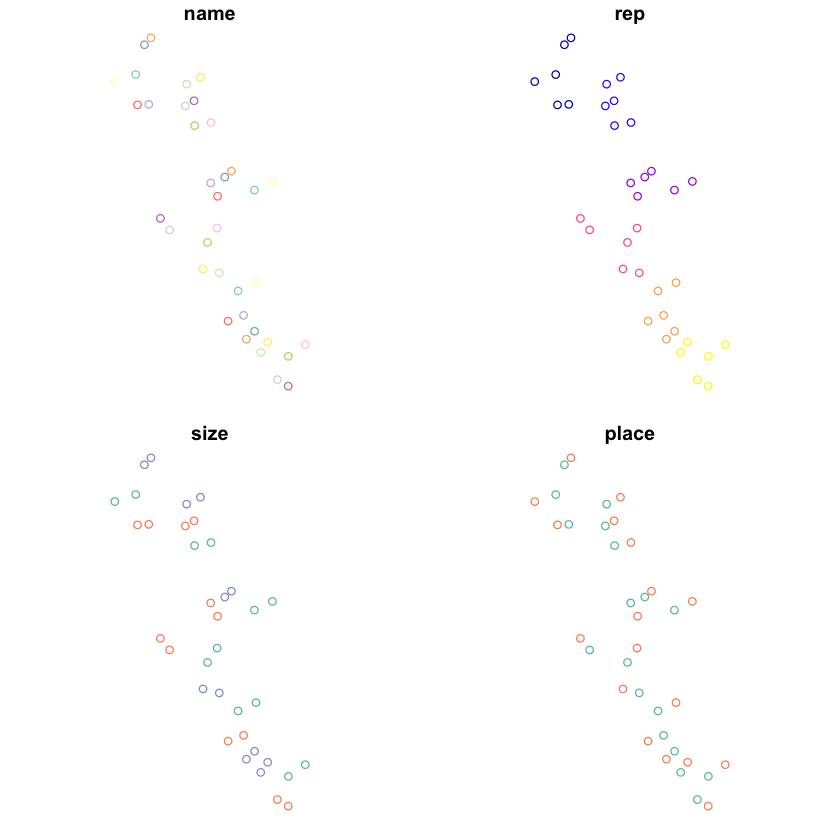

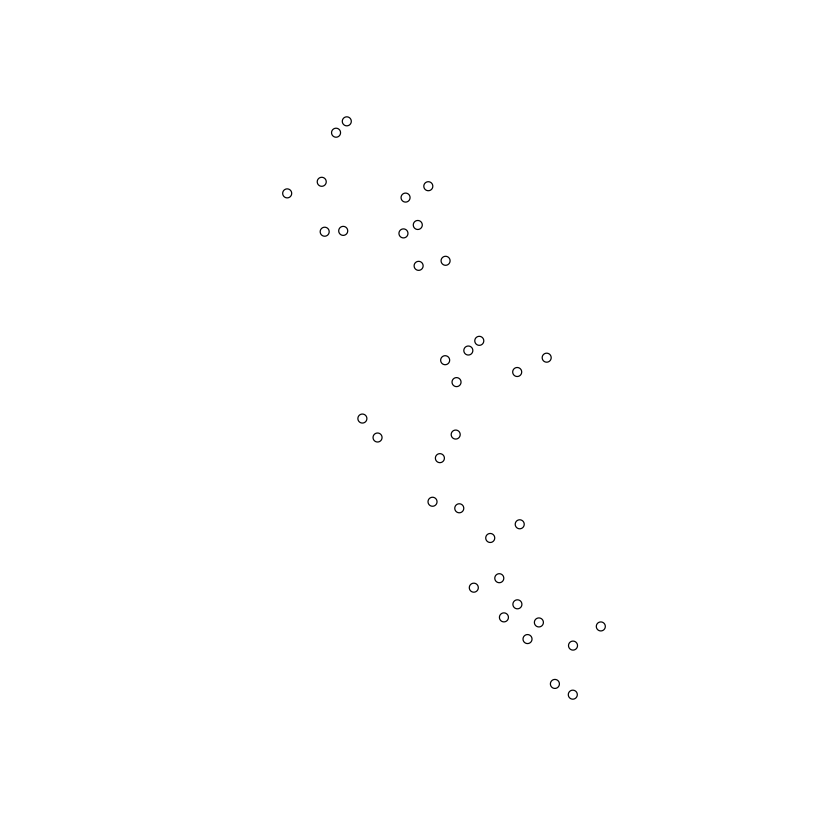

In [43]:
# Going forward, let's use sf objects. I was trained with sp, but sf seems like the package for the future

# Plot sites
plot(sites_sf)
plot(st_geometry(sites_sf))


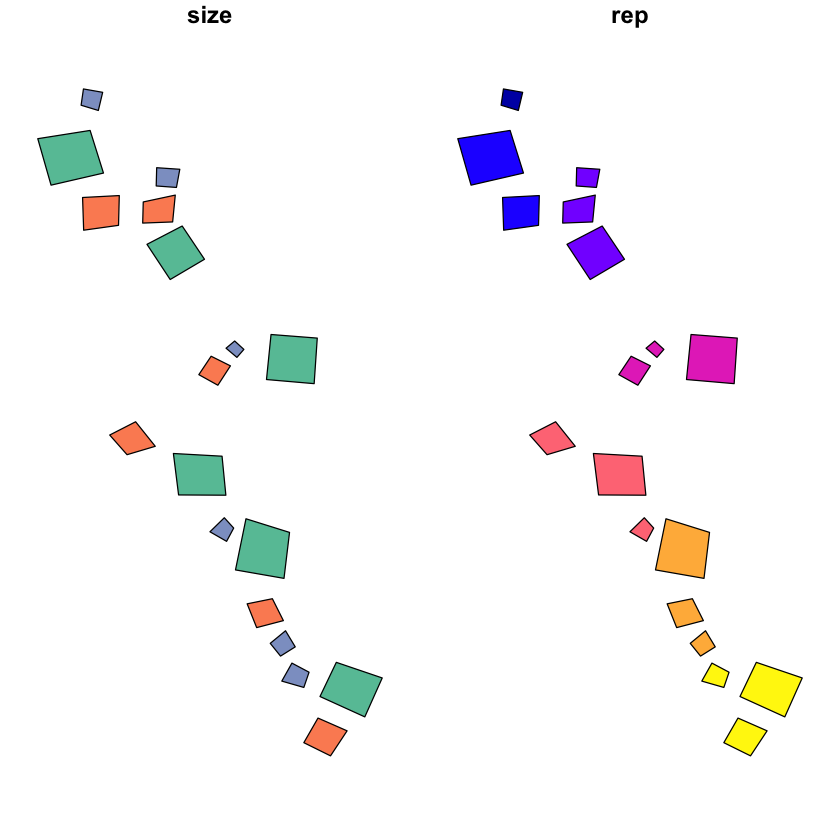

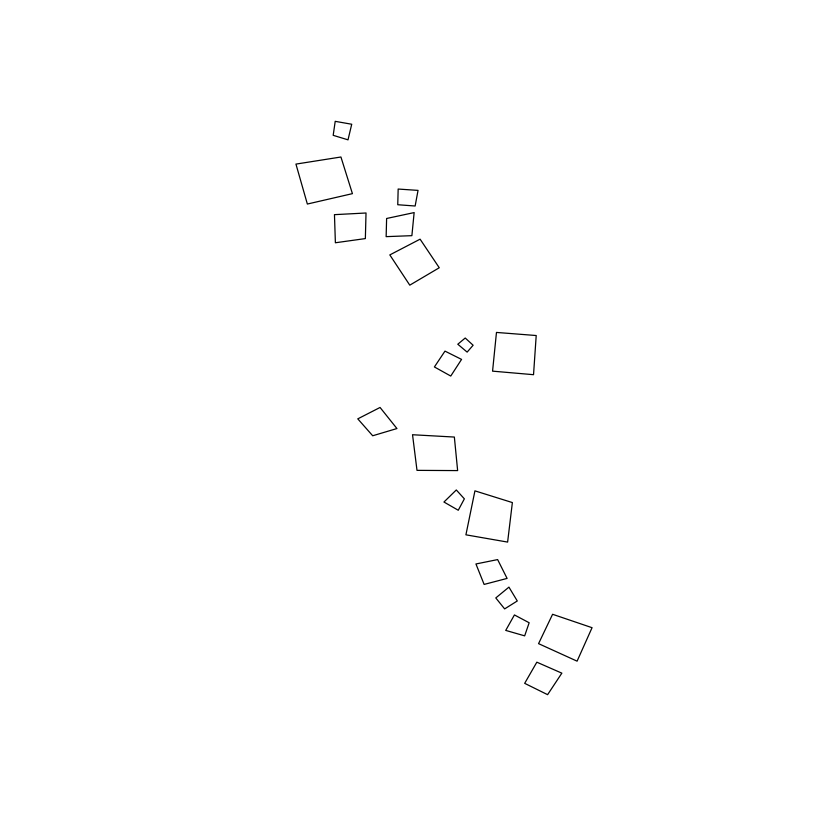

In [44]:
# Plot fragment boundaries and sites
plot(frags_sf)
plot(st_geometry(frags_sf))

In [ ]:
#Plot sites and fragment boundaries together
plot(st_geometry(frags_sf))
plot(st_geometry(sites_sf), pch=19, add=T)
# Why don't we see them together. 

In [45]:
# Troubleshoot: think to CRS first. 
crs(frags_sf)
crs(sites_sf)
# They're different. The fragments are in a UTM projection

CRS arguments:
 +proj=utm +zone=55 +south +datum=WGS84 +units=m +no_defs 

CRS arguments: +proj=longlat +datum=WGS84 +no_defs 

### Brief glimpse at Coordinate Reference Systems

* Coordinate reference systems (CRS) are either projected or unprojected 
    * Unprojected (i.e. global, geographic)
        * curved representations of Earth
        * great for visualizing large areas (e.g., spanning countries)
        * e.g., Google Earth
    * Projected
        * flat projection of curved surface
        * good for spatial analyses (i.e. more precise local measurements)
        * e.g., paper map, Google Maps
* Two common CRS: UTM (projected) and WGS84 (geographic)
* There is so much more to CRS, but this is all we'll cover

![utm-usa](figures/utm-usa.png)


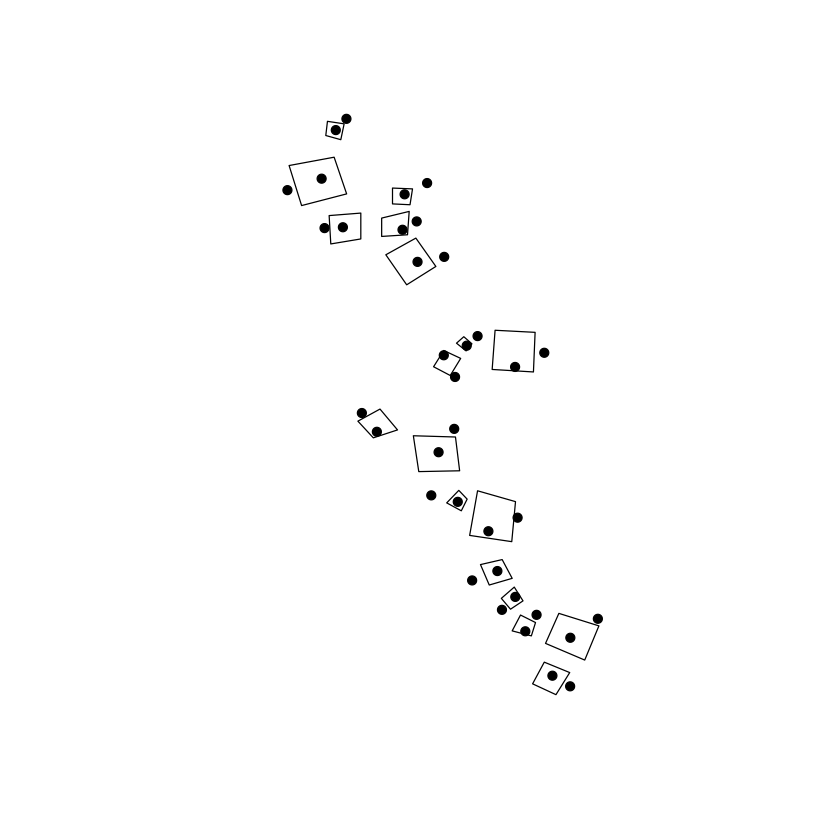

In [64]:
# Transform fragments object to have same CRS as sites
frags_sf_reproj <- st_transform(frags_sf, 4326)

# Now plot fragments and sites together
plot(st_geometry(frags_sf_reproj))
plot(st_geometry(sites_sf), pch=19, add=T)

### Mapping
* This map is sufficient for a basic visualization, but we can do better.
* Our objective is to create an interactive map so we can explore our field site more easily. Now that we have our spatial data loaded in R and formatted properly, we can start building a map. 
* There are many ways to plot interactive maps, like `plotly` or `leaflet`. We will use `tmap`, which isn't compatible in jupyter notebook.

* AIS how to share a tmap map?
* AIS how to put orthomosaic in the background
********************************

In [ ]:
# Embed your map in a webpage: 
# <iframe src="/figures/wogwog_esribackdrop.html" frameborder=0,  height=400, width="100%", scrolling="no"></iframe>

### Supporting cast
* Visualize your data in a GIS as a sanity check before plotting in R or doing analyses. I recommend QGIS since it's open source. Also, store all your data in one GIS project.
* Create spatial data online using [geojson.io](https://geojson.io/) 
* If you need to convert your data into a crazy CRS, try [NOAA's Vertical Datum tool](https://www.vdatum.noaa.gov/)
* Great resource for geospatial data handling and analysis: EarthDataScience - based out of CU's Earth Lab
* For students, the university library often has a spatial librarian. Phil White at CU is great.
* As always, stackoverflow and your spatially-oriented friends are great resources

### Questions?

AIS INSERT PRETTY MAP HERE

https://github.com/annaspiers/spatial-data_mapping_RLadies

To do  
 - fill out learning objectives
 - add photos throughout and generally make it more interactive
 - check out leah's corresponding lessons for images
 - freatuer https://www.earthdatascience.org/
 - format slides so information is visible on slides: spatial-data_mapping_RLadies anna$ jupyter nbconvert tutorial.ipynb --to slides --post serve
     - https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f
 - write README. make clear that the data were created for demonstration only and not for scientific use
 
 
 
 3. Work through some advanced mapping techniques to show the range of versatility of mapping in R. There are plenty of examples online that offer a few cookie cutter ways to map your data basically, but showing some cool expansions or extra features that are harder to find would be a good use of time  
* **Cool examples of the range of versatility, harder to find stuff, maybe some sticking points that took you a while to work through and the solution.**


##### Relevant topics that I will not cover
* conversion from proj4 to prO(theta)4 - when and why?
* working with Raster data (this will involve only vector data)
* QGIS stuff... how to share QGIS data? 
* File naming conventions - agreed upon by team or standard (e.g., remote sensing data: L0, L1, etc.)
* best practices in storing data (save large data files locally)
